In [52]:
import numpy as np
import pandas as pd
import random as rd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df = pd.read_csv("digits.csv")

In [3]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number_label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [4]:
df["number_label"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [5]:
pixels = df.drop("number_label", axis=1)

## DISPLAYING AN IMAGE AS AN EXAMPLE

In [6]:
image_exm = pixels.iloc[0]
image_exm

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     5.0
pixel_0_3    13.0
pixel_0_4     9.0
             ... 
pixel_7_3    13.0
pixel_7_4    10.0
pixel_7_5     0.0
pixel_7_6     0.0
pixel_7_7     0.0
Name: 0, Length: 64, dtype: float64

In [7]:
image_exm = image_exm.to_numpy()

In [8]:
image_exm

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [9]:
image_exm = image_exm.reshape(8,8)

In [10]:
image_exm

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<AxesSubplot:>

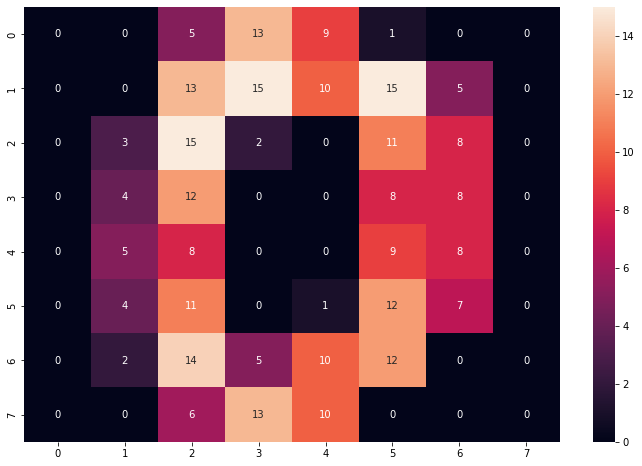

In [11]:
plt.figure(figsize=(12,8))
sns.heatmap(image_exm, annot=True)


## SCALING

In [12]:
scaled_pixels = preprocessing.scale(pixels)

In [13]:
scaled_pixels

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

## APPLYING PCA

In [14]:
pca = PCA(n_components=2)

### We want first 2 principal components

In [15]:
pca.fit(scaled_pixels)

PCA(n_components=2)

In [16]:
pca_pixels = pca.transform(scaled_pixels)

### pca_pixels are the coordinates for a PCA graph based on the loading scores and the scaled pixels

In [17]:
# Variations for every principal component
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

In [18]:
per_var

array([12. ,  9.6])

### Let's draw the Scree Plot

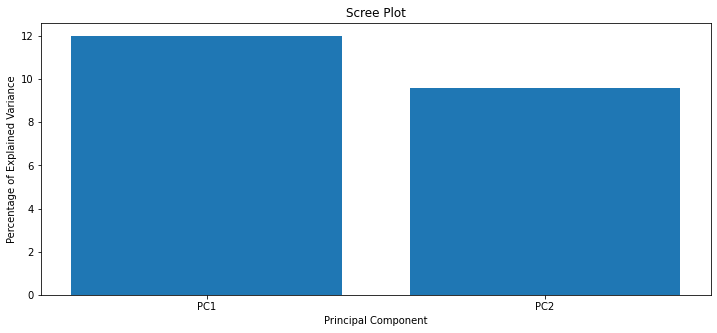

In [19]:
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(12,5))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

## DRAWING PCA PLOT

In [20]:
pca_df = pd.DataFrame(pca_pixels, index=df.index, columns=labels)

In [21]:
pca_df

,PC1,PC2
0,1.914211,-0.954507
1,0.588982,0.924641
2,1.302039,-0.317182
3,-3.020768,-0.868773
4,4.528946,-1.093490
...,...,...
1792,0.104330,0.255029
1793,2.423236,-1.429609
1794,1.022594,-0.147921
1795,1.076054,-0.380908


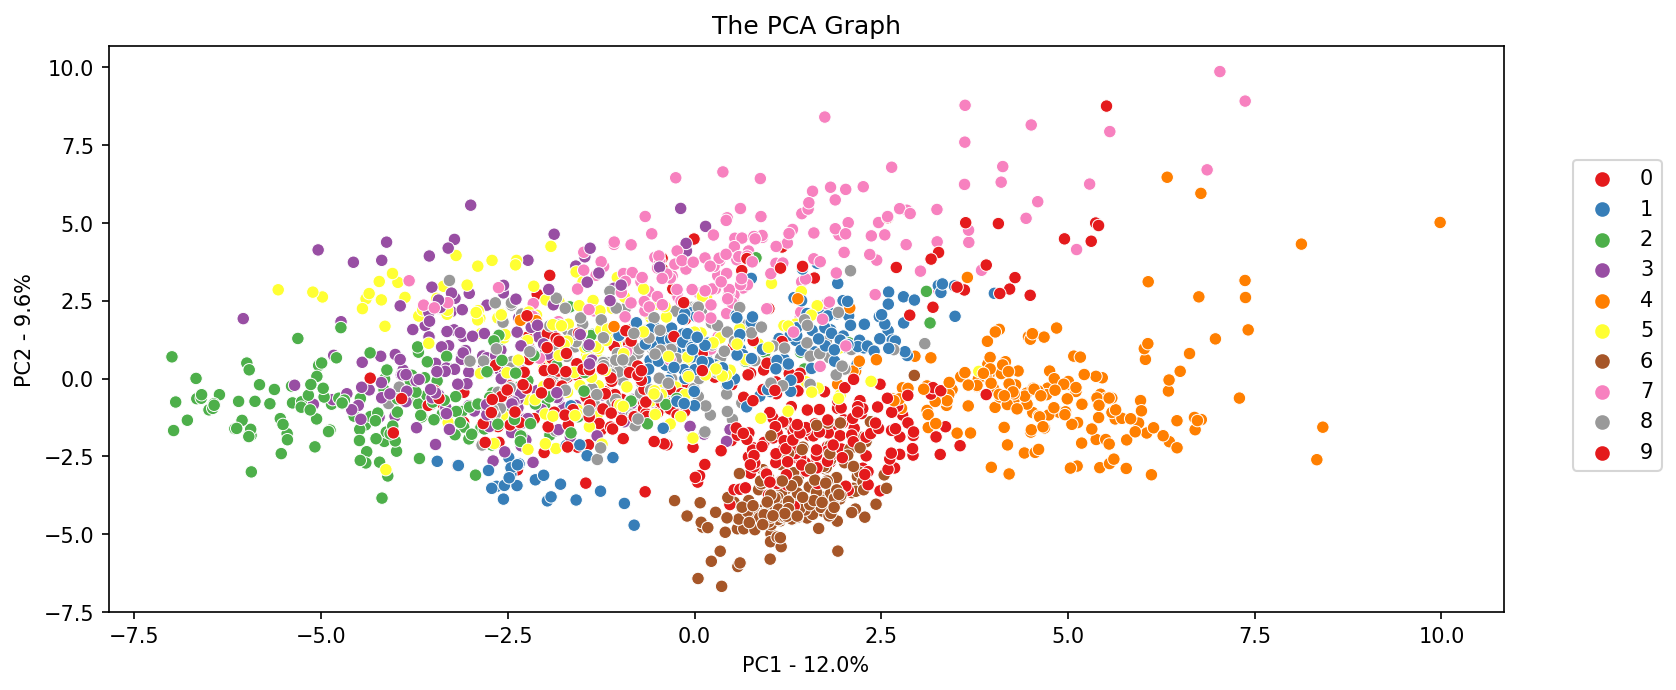

In [42]:
plt.figure(figsize=(12,5),dpi=150)
sns.scatterplot(x=pca_df.PC1, y=pca_df.PC2, hue=df["number_label"], palette="Set1")
plt.title("The PCA Graph")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))
plt.legend(loc=(1.05, 0.25))
plt.show()

### Based on the graph, we can observe that the group of data points labeled as 4 is the most separated from the other groups. This indicates that the data points in this group are the most distinct from those in the other groups. Similarly, we can see that the groups labeled as 2, 6, and 9 are also quite well separated from the other groups, suggesting that these groups contain relatively distinct data points as well.

# PCA WITH 3 COMPONENTS

In [43]:
pca = PCA(n_components=3)

In [44]:
pixels = pca.fit_transform(scaled_pixels)

In [46]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)
per_var

array([12. ,  9.6,  8.4])

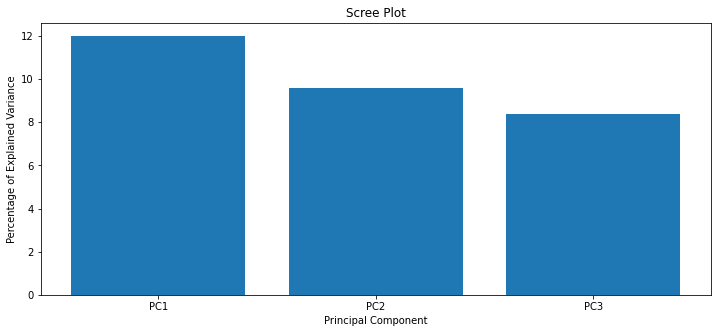

In [47]:
labels = ["PC" + str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(12,5))
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree Plot")
plt.show()

In [49]:
labels

['PC1', 'PC2', 'PC3']

In [50]:
pca_df = pd.DataFrame(pixels, index=df.index, columns=labels)
pca_df

,PC1,PC2,PC3
0,1.914227,-0.954508,-3.945998
1,0.588968,0.924639,3.924722
2,1.302055,-0.317123,3.023268
3,-3.020770,-0.868768,-0.801770
4,4.528966,-1.093473,0.973142
...,...,...,...
1792,0.104311,0.254972,-3.765819
1793,2.423227,-1.429633,-3.045221
1794,1.022600,-0.147926,2.470030
1795,1.076046,-0.380938,-2.455431


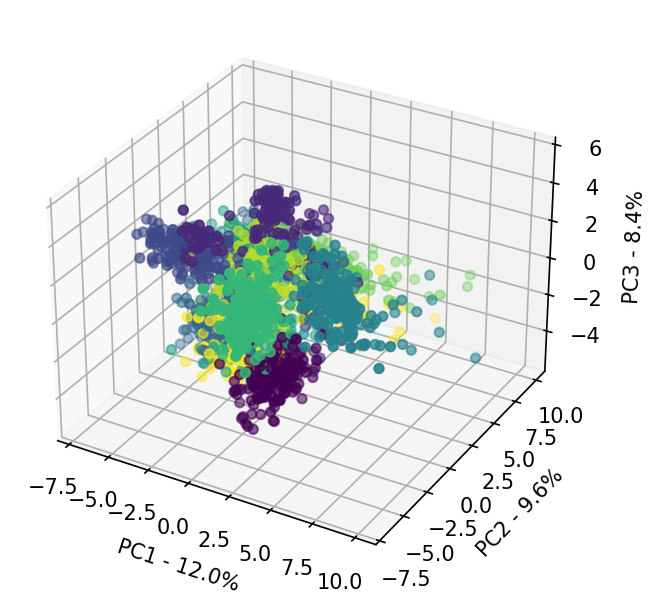

In [61]:
fig = plt.figure(figsize=(12, 5), dpi=150)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=pca_df.PC1, ys=pca_df.PC2, zs=pca_df.PC3, c=df["number_label"])

ax.set_xlabel("PC1 - {0}%".format(per_var[0]))
ax.set_ylabel("PC2 - {0}%".format(per_var[1]))
ax.set_zlabel("PC3 - {0}%".format(per_var[2]));